In [1]:
import pandas as pd
import re
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Evaluation Results
1. Overview
2. Template-Level

In [2]:
# load data
results_folder = "PATH_TO_RESULTS"

beneficial_effects_true_label = 0

to_st_0_t = pd.read_csv(str(results_folder + "temporal_order/standard_tests/reports_templates_label0.csv"), index_col=0)
to_st_1_t = pd.read_csv(str(results_folder + "temporal_order/standard_tests/reports_templates_label1.csv"), index_col=0)
to_te_0_t = pd.read_csv(str(results_folder + "temporal_order/time_entity_tests/reports_templates_label0.csv"), index_col=0)
to_te_1_t = pd.read_csv(str(results_folder + "temporal_order/time_entity_tests/reports_templates_label1.csv"), index_col=0)
to_terel_0_t = pd.read_csv(str(results_folder + "temporal_order/time_entity_rel_tests/reports_templates_label0.csv"), index_col=0)
to_terel_1_t = pd.read_csv(str(results_folder + "temporal_order/time_entity_rel_tests/reports_templates_label1.csv"), index_col=0)

ps_1_t = pd.read_csv(str(results_folder + "positive_sentiment/reports_templates_label1.csv"), index_col=0)

# change name be_b_0_t if label changes, according to annotation scheme, double-check the file names
if beneficial_effects_true_label == 0:
    be_b_t = pd.read_csv(str(results_folder + "beneficial_effect/beneficial/reports_templates_label0.csv"), index_col=0)
else:
    be_b_t = pd.read_csv(str(results_folder + "beneficial_effect/beneficial/reports_templates_label1.csv"), index_col=0)
be_nb_1_t = pd.read_csv(str(results_folder + "beneficial_effect/non_beneficial/reports_templates_label1.csv"), index_col=0)

ne_0_t = pd.read_csv(str(results_folder + "negation/reports_templates_label0.csv"), index_col=0)
ne_1_t = pd.read_csv(str(results_folder + "negation/reports_templates_label1.csv"), index_col=0)

In [3]:
def count_all_passes(results_df_list):
    total_tests = 0
    passed_tests = 0

    for t in results_df_list:
        total_tests += t["total_tests"].sum()
        passed_tests += t["passed_tests"].sum()
    
    return passed_tests, total_tests

def create_results_overview_df(all_results_dfs, unlabelled_testtypes_dict=None):

    results = {}
    generic_name_pattern = re.compile("^[^-]+")

    for testname, testresults in all_results_dfs.items():
        passed, total = count_all_passes([testresults])
        pc = float(np.round((passed/total)*100, decimals=2))

        # get label
        try:
            label = int(testname[-1])
        except:
            label = unlabelled_testtypes_dict[testname]

        results[testname] = {"Test": testname, "Capability": re.findall(string=testname, pattern=generic_name_pattern)[0], "Expected Label": label, "Passed Test Cases": passed, "Total Test Cases": total, "Test Case Pass Rate (%)": pc}
    
    return pd.DataFrame(results)


In [4]:
# count passes for a single capability
ne_0_tests_passes, ne_0_tests_total = count_all_passes([ne_0_t])
ne_1_tests_passes, ne_1_tests_total = count_all_passes([ne_1_t])

print("passed {:.2f} %, {} of {}".format((ne_0_tests_passes/ne_0_tests_total)*100, ne_0_tests_passes, ne_0_tests_total))
print("passed {:.2f} %, {} of {}".format((ne_1_tests_passes/ne_1_tests_total)*100, ne_1_tests_passes, ne_1_tests_total))

passed 92.12 %, 760 of 825
passed 60.33 %, 181 of 300


In [5]:
all_test_types = {"TempOrder-std-l0": to_st_0_t, "TempOrder-std-l1": to_st_1_t,
                   "TempOrder-siTE-l0": to_te_0_t, "TempOrder-siTE-l1": to_te_1_t,
                   "TempOrder-relTE-l0": to_terel_0_t, "TempOrder-relTE-l1": to_terel_1_t,
                   "PosSent-l1": ps_1_t, 
                   "BenEff": be_b_t, "BenEff-l1": be_nb_1_t, 
                   "Negation-l0": ne_0_t, "Negation-l1": ne_1_t}

## 1. Overview
How many tests passed per capability and gold label?

In [6]:
#### RESULTS OVERVIEW ALL #####
all_test_types_list = [to_st_1_t, to_st_0_t, to_te_0_t, to_te_1_t, to_terel_0_t, to_terel_1_t,
 ps_1_t, be_b_t, be_nb_1_t, ne_0_t, ne_1_t]
count_all_passes(all_test_types_list)

(7523, 11265)

In [7]:
### OVERVIEW OF RESULTS PER CAPABILITY ####
results_df_overview = create_results_overview_df(all_test_types,
 unlabelled_testtypes_dict={"BenEff": beneficial_effects_true_label})

results_df_overview = results_df_overview.transpose()
results_df_overview["Passed Test Cases"] = results_df_overview["Passed Test Cases"].astype(int)
results_df_overview["Total Test Cases"] = results_df_overview["Total Test Cases"].astype(int)
results_df_overview.reset_index(drop=True, inplace=True)

results_df_overview

,Test,Capability,Expected Label,Passed Test Cases,Total Test Cases,Test Case Pass Rate (%)
0,TempOrder-std-l0,TempOrder,0,568,1050,54.1
1,TempOrder-std-l1,TempOrder,1,436,900,48.44
2,TempOrder-siTE-l0,TempOrder,0,818,1050,77.9
3,TempOrder-siTE-l1,TempOrder,1,948,1050,90.29
4,TempOrder-relTE-l0,TempOrder,0,1137,1575,72.19
5,TempOrder-relTE-l1,TempOrder,1,601,1575,38.16
6,PosSent-l1,PosSent,1,1946,2700,72.07
7,BenEff,BenEff,0,9,120,7.5
8,BenEff-l1,BenEff,1,119,120,99.17
9,Negation-l0,Negation,0,760,825,92.12


In [ ]:
results_df_overview.to_csv(path_or_buf=str(results_folder+"table_results_overview.csv"), index=False)

### 1.1. Plot Results

In [8]:
### ADD BASELINE VALUE HERE ###
# Add test set (tweet) results for better comparison. 
# Put in the recall values * 100 in "Test Case Pass Rate (%)" for noADE and ADE

baseline_noADE = 97.5
baseline_ADE = 67.6

In [9]:
# create new df to facilitate plotting
results_df_overview_forplotting = results_df_overview.copy(deep=True)

# rename the label
expected_label_fullname = ["ADE" if row["Expected Label"] == 1 else "no ADE" for i, row in results_df_overview_forplotting.iterrows() ]
results_df_overview_forplotting["Expected Label Fullname"] = expected_label_fullname


# add test set (tweet) results for better comparison
results_df_model_original = pd.DataFrame({"Test": ["Original-Testset-l0", "Original-Testset-l1"],
                                          "Capability": ["Original", "Original"],
                                          "Expected Label": [0, 1],
                                          "Passed Test Cases": [None, None], 
                                          "Total Test Cases": [None, None],
                                          "Test Case Pass Rate (%)": [baseline_noADE, baseline_ADE], 
                                          "Expected Label Fullname": ["no ADE", "ADE"]})
results_df_overview_forplotting = pd.concat([results_df_overview_forplotting, results_df_model_original])
results_df_overview_forplotting.reset_index(drop=True, inplace=True)


results_type = ["orig" if row["Capability"] == "Original" else "CL" for i, row in results_df_overview_forplotting.iterrows() ]
results_df_overview_forplotting["Results Type"] = results_type
results_df_overview_forplotting

,Test,Capability,Expected Label,Passed Test Cases,Total Test Cases,Test Case Pass Rate (%),Expected Label Fullname,Results Type
0,TempOrder-std-l0,TempOrder,0,568,1050,54.1,no ADE,CL
1,TempOrder-std-l1,TempOrder,1,436,900,48.44,ADE,CL
2,TempOrder-siTE-l0,TempOrder,0,818,1050,77.9,no ADE,CL
3,TempOrder-siTE-l1,TempOrder,1,948,1050,90.29,ADE,CL
4,TempOrder-relTE-l0,TempOrder,0,1137,1575,72.19,no ADE,CL
5,TempOrder-relTE-l1,TempOrder,1,601,1575,38.16,ADE,CL
6,PosSent-l1,PosSent,1,1946,2700,72.07,ADE,CL
7,BenEff,BenEff,0,9,120,7.5,no ADE,CL
8,BenEff-l1,BenEff,1,119,120,99.17,ADE,CL
9,Negation-l0,Negation,0,760,825,92.12,no ADE,CL


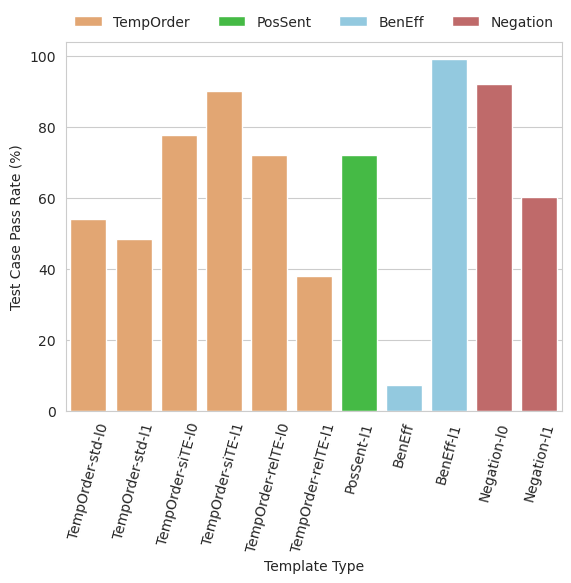

In [10]:
### Plot all results ###

sns.set_style("whitegrid")
palette2 = sns.color_palette(["sandybrown", "limegreen", "skyblue", "indianred"])

plot1 = sns.barplot(data=results_df_overview_forplotting.iloc[:-2, :], x="Test", y="Test Case Pass Rate (%)",
  hue="Capability", dodge=False, palette=palette2)


plt.legend(loc="lower center", bbox_to_anchor=(.5, 1), ncol=4, title=None, frameon=False)
plt.ylabel("Test Case Pass Rate (%)")
plt.xlabel("Template Type")
plt.xticks(rotation=75)
plt.show()

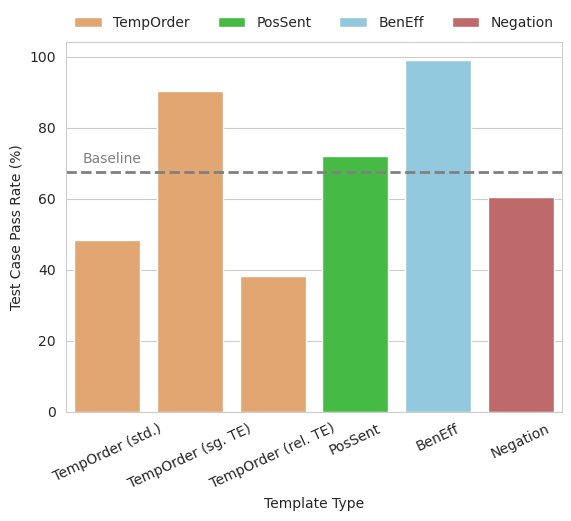

In [11]:
### Plot for a single label only, with baseline ###

SINGLE_LABEL = 1

# data subset
results_df_overview_forplotting_onelabel = results_df_overview_forplotting[results_df_overview_forplotting["Expected Label"] == SINGLE_LABEL]
baseline_value = list(results_df_overview_forplotting_onelabel[results_df_overview_forplotting_onelabel["Capability"] == "Original"]["Test Case Pass Rate (%)"])[0]
# style
sns.set_style("whitegrid")
palette2 = sns.color_palette(["sandybrown", "limegreen", "skyblue", "indianred"])

plot1 = sns.barplot(data=results_df_overview_forplotting_onelabel.iloc[:-1, :], x="Test", y="Test Case Pass Rate (%)", hue="Capability", dodge=False, palette=palette2)

# baseline
plt.axhline(baseline_value, ls='--', lw=2, color="grey")
plt.text(-0.3,70, "Baseline", color="grey")

# text and labels
plt.legend(loc="lower center", bbox_to_anchor=(.5, 1), ncol=4, title=None, frameon=False)
plt.ylabel("Test Case Pass Rate (%)")
plt.xlabel("Template Type")
plt.xticks(rotation=25, ticks = range(0,6), 
           labels=["TempOrder (std.)", "TempOrder (sg. TE)", "TempOrder (rel. TE)", "PosSent", "BenEff", "Negation"])

plt.show()

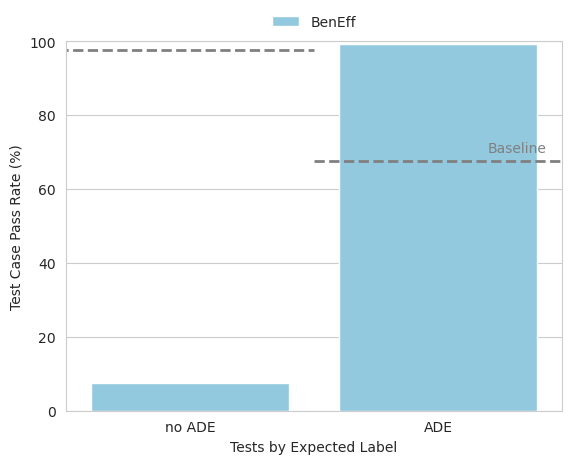

In [12]:
### Plot for a single capability for each label, with baseline ###

SINGLE_CAPABILITY = "BenEff"

# data subset
results_df_overview_forplotting_onecap = results_df_overview_forplotting[results_df_overview_forplotting["Capability"] == SINGLE_CAPABILITY]
baseline_value_pos = list(results_df_overview_forplotting[(results_df_overview_forplotting["Capability"] == "Original") 
                                                          & (results_df_overview_forplotting["Expected Label"] == 1)]["Test Case Pass Rate (%)"])[0]
baseline_value_neg = list(results_df_overview_forplotting[(results_df_overview_forplotting["Capability"] == "Original") 
                                                          & (results_df_overview_forplotting["Expected Label"] == 0)]["Test Case Pass Rate (%)"])[0]
# style
sns.set_style("whitegrid")
bar_color = "skyblue"

# plot
plot1 = sns.barplot(data=results_df_overview_forplotting_onecap, x="Expected Label Fullname", y="Test Case Pass Rate (%)", hue="Capability", dodge=False, palette=sns.color_palette([bar_color]))

# baseline
plt.axhline(y=baseline_value_pos, xmin=0.5, xmax=1.5, ls='--', lw=2, color="grey")
plt.axhline(y=baseline_value_neg, xmin=-0.5, xmax=0.5, ls='--', lw=2, color="grey")
plt.text(1.2,70, "Baseline", color="grey")

# text and labels
plt.legend(loc="lower center", bbox_to_anchor=(.5, 1), ncol=4, title=None, frameon=False)
plt.ylabel("Test Case Pass Rate (%)")
plt.xlabel("Tests by Expected Label")
plot1.set(ylim=(0,100))

plt.show()

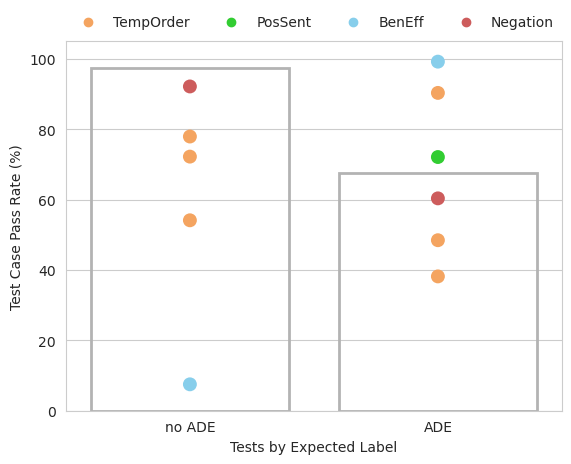

In [13]:
### All results in one plot ###

show_baseline = True # change to show baseline 
#baseline_barplot = True 

# style
sns.set_style("whitegrid")
palette2 = sns.color_palette(["sandybrown", "limegreen", "skyblue", "indianred"])

# plot and baseline
fig, ax = plt.subplots()
if show_baseline:
    ax = sns.barplot(data=results_df_overview_forplotting.iloc[-2:, :], x="Expected Label Fullname", y="Test Case Pass Rate (%)", linewidth=2, edgecolor="0.7", facecolor=(0, 0, 0, 0))

ax = sns.swarmplot(data=results_df_overview_forplotting.iloc[:-2, :], x="Expected Label Fullname", y="Test Case Pass Rate (%)", marker='o', size=10, hue="Capability", palette=palette2, hue_order=["TempOrder", "PosSent", "BenEff", "Negation"])

# text and labels
lgd=plt.legend(loc="lower center", bbox_to_anchor=(.5, 1), ncol=5, title=None, frameon=False)
plt.xlabel("Tests by Expected Label")
plt.ylabel("Test Case Pass Rate (%)")
ax.set(ylim=(0,105))
        
plt.show()

## 2. Template-level
What is the performance on different templates of the same capability?

In [14]:
def get_template_passrate(all_results_dfs):

    df_dict = {}
    #generic_name_pattern = re.compile("^[^_]+")

    for testname, testresults in all_results_dfs.items():
        new_testresults = testresults.copy(deep=True)
        new_testresults["ratio_%"] = np.round(new_testresults["passed_tests"]/new_testresults["total_tests"]*100, decimals=2)
        df_dict[testname] = new_testresults
    return df_dict

def create_template_performance_overview(all_results_dfs):

    results = {}
    results_combined = pd.DataFrame(columns=["test_type", "template_id", "template", "total_tests", "passed_tests", "ratio%"])


    for testname, testresults in all_results_dfs.items():
        # create new test pass ratio column
        testresults["ratio%"] = np.round(testresults["passed_tests"]/testresults["total_tests"]*100, decimals=2)

        # save new df 
        results[testname] = testresults
        
        # add results to combination of all results dataframe
        testresults["test_type"] = testname
        results_combined = pd.concat([results_combined, testresults])

    results_combined.reset_index(drop=True, inplace=True)

    return results, results_combined      

In [15]:
all_test_types_ratio = get_template_passrate(all_test_types)

# show performance per template on a single capability and gold label
all_test_types_ratio["TempOrder-std-l0"]

,template_id,template,total_tests,passed_tests,ratio_%
0,template_000,I was put on {drug} after suffering from {ade}.,75,20,26.67
1,template_001,"After suffering from {ade}, I took {drug}.",75,75,100.00
2,template_002,I endured {ade} before I was put on {drug}.,75,49,65.33
3,template_003,I endured {ade} ahead of taking {drug}.,75,13,17.33
4,template_004,"Before I started taking {drug}, I suffered fro...",75,16,21.33
5,template_005,"Ahead of taking {drug}, I suffered from {ade}.",75,0,0.00
6,template_006,"When I started being medicated with {drug}, I ...",75,12,16.00
7,template_007,"I was already experiencing {ade}, when I start...",75,64,85.33
8,template_008,"I was enduring {ade}, then I was put on {drug}.",75,70,93.33
9,template_009,"I was encountering {ade}, but it was not due t...",75,54,72.00


In [16]:
# show histogram of performance rate of successfully classified test cases per template

# create dataframe
template_perform_dicts, results_combined = create_template_performance_overview(all_test_types)
test_type_renamer = {"TempOrder-std-l0": "TempOrder standard (no ADE)", "TempOrder-std-l1": "TempOrder standard (ADE)",
                   "TempOrder-siTE-l0": "TempOrder sg. time entity (no ADE)", "TempOrder-siTE-l1": "TempOrder sg. time entity (ADE)",
                   "TempOrder-relTE-l0": "TempOrder db. time entities (no ADE)", "TempOrder-relTE-l1": "TempOrder db. time entities (ADE)",
                   "PosSent-l1": "PosSent (ADE)", 
                   "BenEff": "BenEff (no ADE)", "BenEff-l1": "BenEff (ADE)", 
                   "Negation-l0": "Negation (no ADE)", "Negation-l1": "Negation (ADE)"}
results_combined["test_type"] = results_combined["test_type"].replace(test_type_renamer)


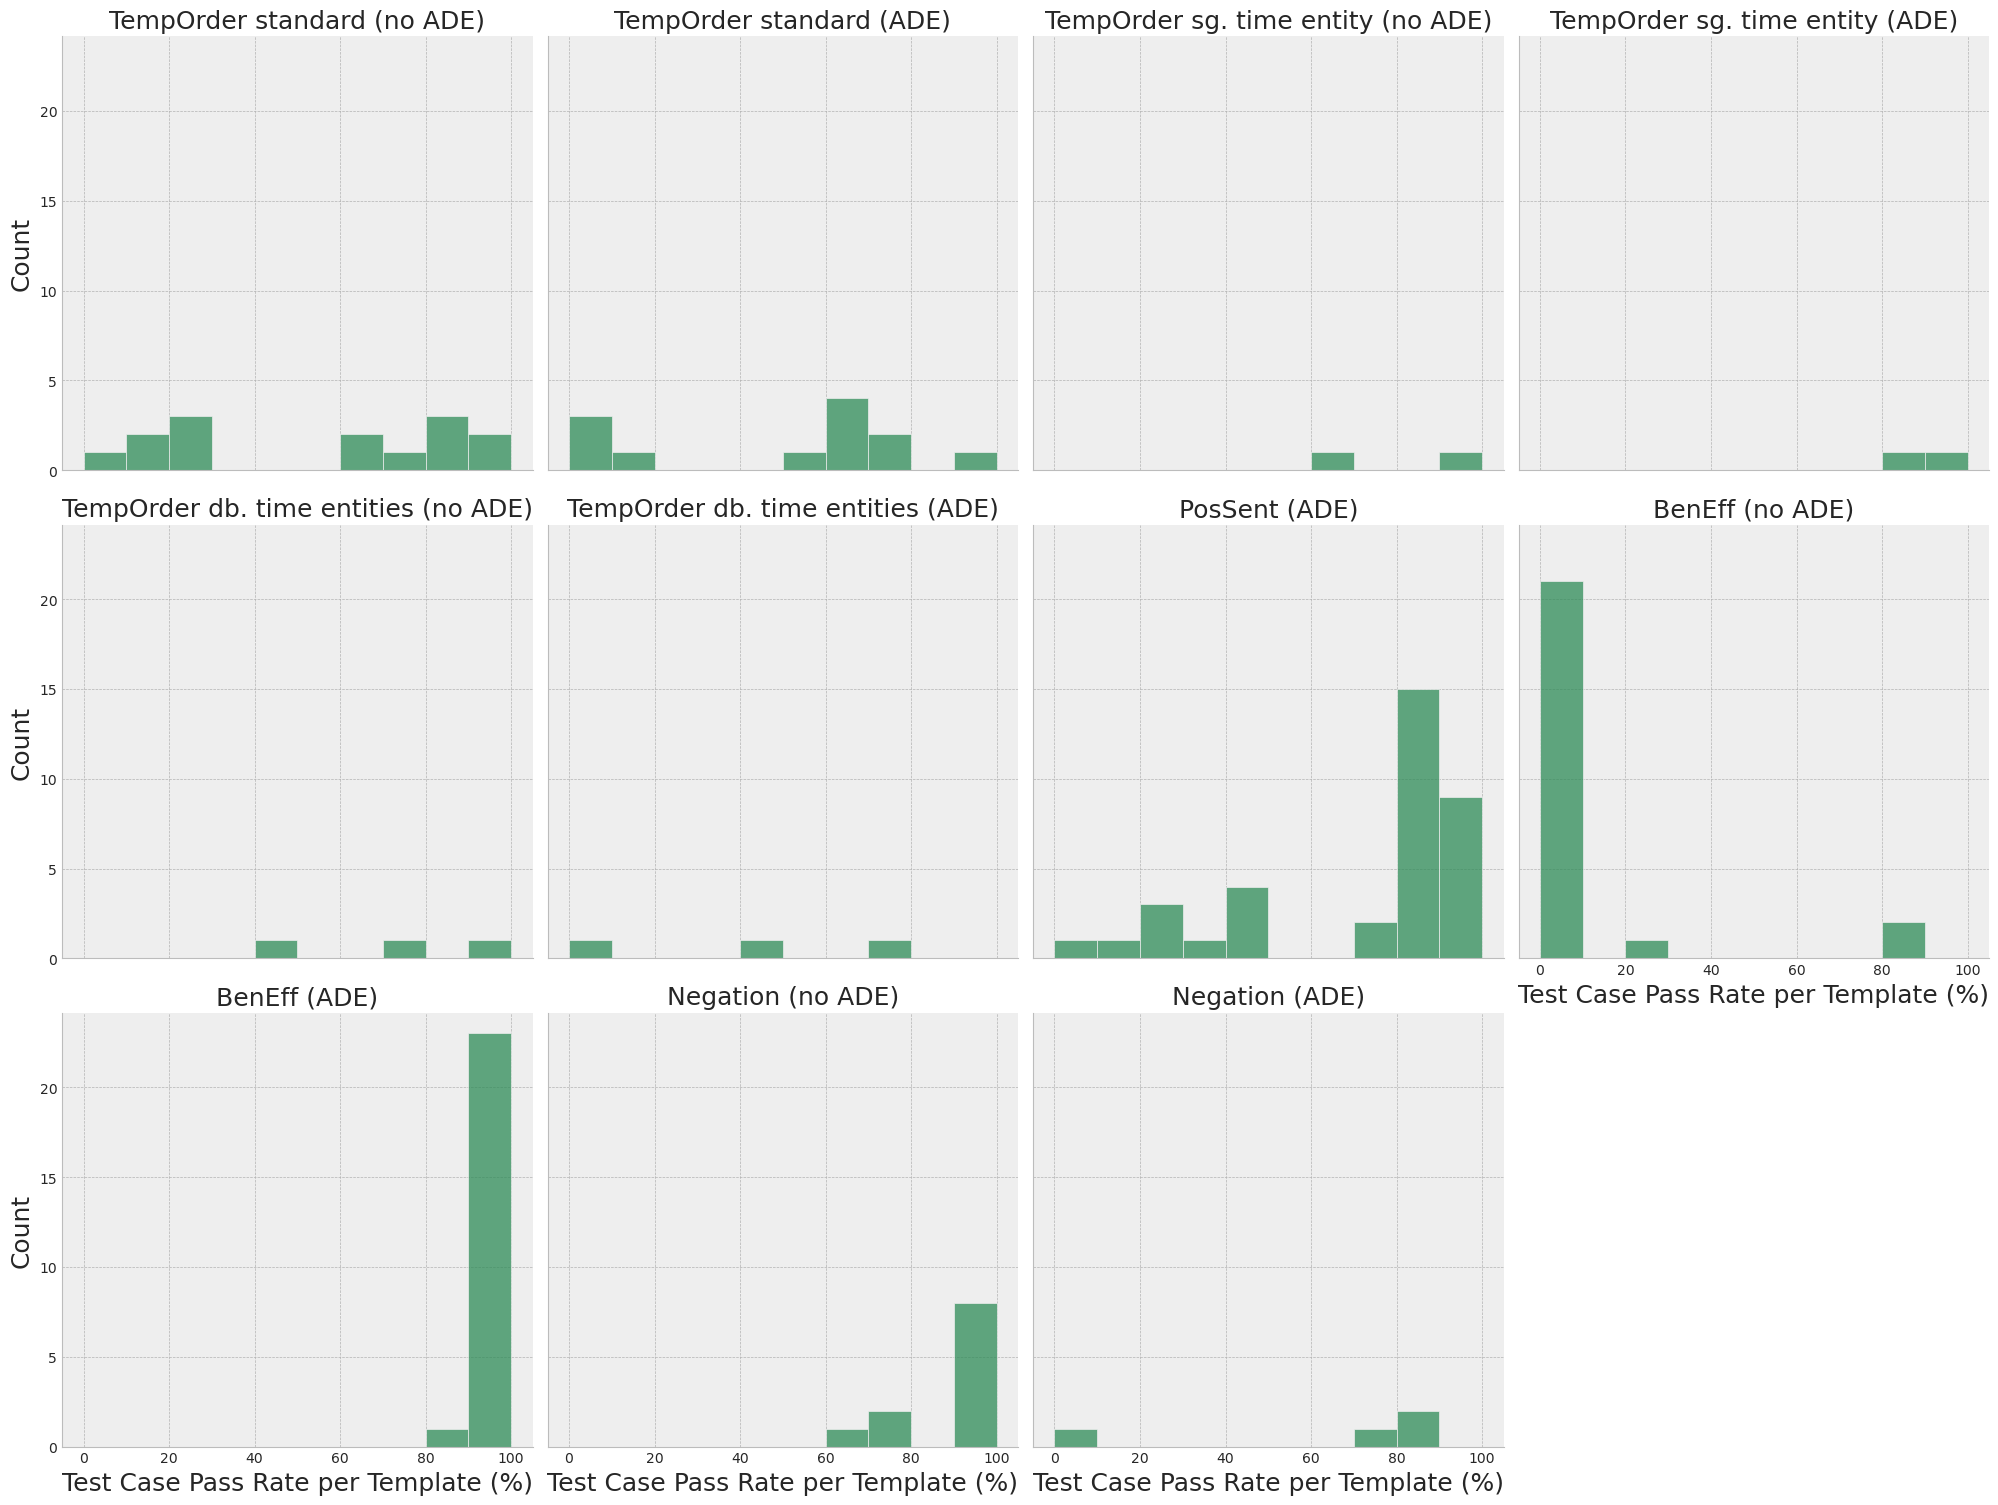

In [17]:
# plot all

plt.style.use("bmh")

g = sns.displot(results_combined, x="ratio%", col="test_type", col_wrap=4, binwidth=10, color="seagreen")

g.set_axis_labels("Test Case Pass Rate per Template (%)", "Count", fontsize=18)
g.set_titles("{col_name}", size=18)

plt.show()